
# Домашнє завдання 11: Класифікація рецензій з використанням RNN

**Мета:** Побудувати, натренувати та порівняти ефективність різних архітектур рекурентних нейронних мереж (RNN, LSTM, двосторонні, глибокі) для задачі класифікації рецензій з датасету IMDB.

---


In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, GRU, SpatialDropout1D
from keras.callbacks import EarlyStopping

# Параметри
vocab_size = 10000
maxlen = 500

# Завантаження даних
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

x_train shape: (25000, 500), y_train shape: (25000,)


## Модель 1: Базова SimpleRNN

In [9]:

model_rnn = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.5890 - loss: 0.6558 - val_accuracy: 0.8100 - val_loss: 0.4357
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8287 - loss: 0.4005 - val_accuracy: 0.8034 - val_loss: 0.4351
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8886 - loss: 0.2926 - val_accuracy: 0.8596 - val_loss: 0.3440
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9368 - loss: 0.1776 - val_accuracy: 0.8614 - val_loss: 0.3503
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9540 - loss: 0.1320 - val_accuracy: 0.8420 - val_loss: 0.4210


## Модель 2: LSTM

In [10]:

model_lstm = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5


157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.6233 - loss: 0.6224 - val_accuracy: 0.8498 - val_loss: 0.3642
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.8810 - loss: 0.3017 - val_accuracy: 0.8692 - val_loss: 0.3400
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9188 - loss: 0.2193 - val_accuracy: 0.8762 - val_loss: 0.3068
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.9378 - loss: 0.1725 - val_accuracy: 0.8744 - val_loss: 0.3061
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9558 - loss: 0.1320 - val_accuracy: 0.8854 - val_loss: 0.3365


## Модель 3: Bidirectional LSTM

In [11]:

model_bi = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])
model_bi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bi = model_bi.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.6115 - loss: 0.6404 - val_accuracy: 0.8196 - val_loss: 0.4066
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.8432 - loss: 0.3722 - val_accuracy: 0.8274 - val_loss: 0.3944
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.8794 - loss: 0.2919 - val_accuracy: 0.8874 - val_loss: 0.2855
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9313 - loss: 0.1891 - val_accuracy: 0.8864 - val_loss: 0.2798
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.9482 - loss: 0.1538 - val_accuracy: 0.8728 - val_loss: 0.3272


## Модель 4: Stacked LSTM

In [12]:

model_stacked = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model_stacked.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_stacked = model_stacked.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - accuracy: 0.6514 - loss: 0.6107 - val_accuracy: 0.8406 - val_loss: 0.3795
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - accuracy: 0.8718 - loss: 0.3133 - val_accuracy: 0.8374 - val_loss: 0.3698
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.9091 - loss: 0.2392 - val_accuracy: 0.8478 - val_loss: 0.3634
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - accuracy: 0.9287 - loss: 0.1970 - val_accuracy: 0.8722 - val_loss: 0.3241
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - accuracy: 0.9466 - loss: 0.1494 - val_accuracy: 0.8636 - val_loss: 0.3572


## Модель 5: GRU

In [6]:
# Побудова GRU-моделі
model = Sequential(
    [
        Embedding(vocab_size, 32, input_length=maxlen),
        SpatialDropout1D(0.2),
        GRU(32),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Навчання моделі
early_stop = EarlyStopping(monitor="val_loss", patience=2)
history_gru = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.6107 - loss: 0.6471 - val_accuracy: 0.7976 - val_loss: 0.4302
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.8670 - loss: 0.3275 - val_accuracy: 0.8596 - val_loss: 0.3339
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - accuracy: 0.9124 - loss: 0.2289 - val_accuracy: 0.8746 - val_loss: 0.3093
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9352 - loss: 0.1794 - val_accuracy: 0.8620 - val_loss: 0.3374
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.9479 - loss: 0.1528 - val_accuracy: 0.8796 - val_loss: 0.3358


## Порівняння точності моделей

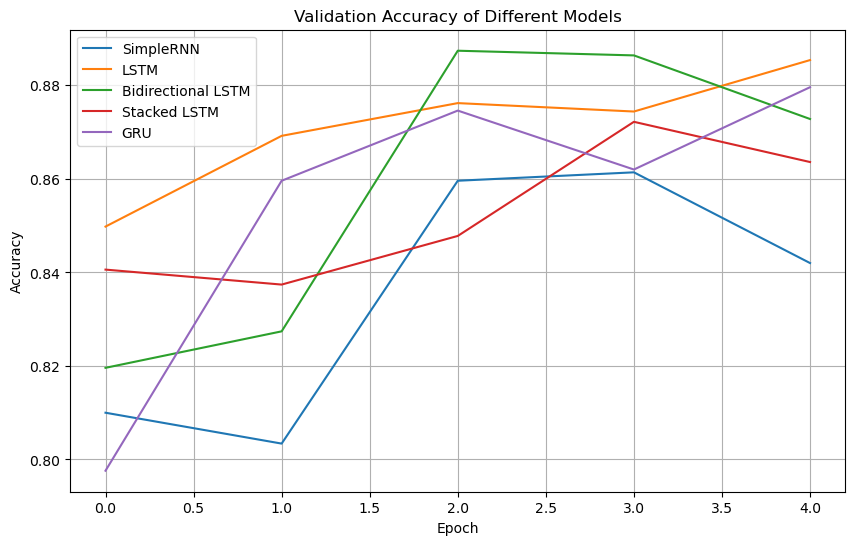

In [13]:

plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['val_accuracy'], label='SimpleRNN')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM')
plt.plot(history_bi.history['val_accuracy'], label='Bidirectional LSTM')
plt.plot(history_stacked.history['val_accuracy'], label='Stacked LSTM')
plt.plot(history_gru.history['val_accuracy'], label='GRU')
plt.title('Validation Accuracy of Different Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



## Висновки

### 1. Simple RNN
- Найменш обчислювально затратна модель (~7 секунд/епоха)
- Швидко навчається, досягаючи 95% точності на тренуванні
- Mенш стабільна на валідації: `val_accuracy ≈ 84%` і починає переобучуватись після 3 епох
- Підходить для простих задач, але програє більш складним моделям по якості

---

### 2. LSTM
- Вдвічі повільніша за SimpleRNN (~16 секунд/епоха)
- Краще утримує довгострокові залежності
- Досягає `val_accuracy ≈ 88.5%` — стабільне і високе значення
- Добре підходить для класифікації тексту з довгими контекстами

---

### 3. Bidirectional LSTM
- Трохи повільніше за LSTM (~21 сек/епоха)
- Використовує контекст як зліва, так і справа
- Досягає найкращого `val_accuracy ≈ 88.7%` вже на 3-й епосі
- Має чудовий баланс між якістю і стабільністю, **найточніша модель**

---

### 4. Stacked LSTM (двошарова)
- Найважча за обчисленнями (~30 сек/епоха)
- `val_accuracy ≈ 87.2%`, стабільна, але не перевершує Bidirectional
- Переобучення спостерігається після 3–4 епох
- Збільшення глибини не дало значного приросту точності

---

### 5. GRU
- Швидше за LSTM, але повільніше за Simple RNN (~19 сек/епоха)
- Хороша якість: `val_accuracy ≈ 87.9%`
- Компроміс між швидкістю LSTM і ефективністю: простіше, але потужне
- Добрий вибір, якщо потрібна швидкість і якість

---

### Загальний висновок:
- Найкраща точність: **Bidirectional LSTM**
- Найшвидша модель: **Simple RNN**, але знижена якість
- Оптимальний компроміс: **GRU** — швидка та ефективна
- Стекування шарів (Stacked LSTM) **не дало великого приросту точності**, але збільшило час

-> Для більшості практичних задач з обмеженням на ресурси GRU — чудовий варіант.
-> Для максимальної якості — Bidirectional LSTM.